In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import pandas as pd
df=pd.read_csv('train.csv')

In [70]:
df.shape

(891, 12)

In [71]:
te=pd.read_csv('test.csv')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.drop('Name',1,inplace=True)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

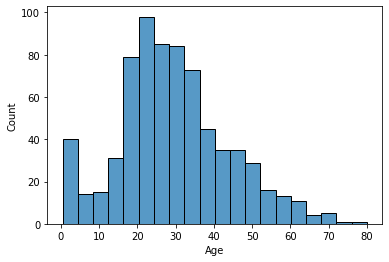

In [79]:
sns.histplot(df['Age'])

In [80]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Majority class < 2 * Minority class
## 549 < 342*2
# No class imbalance

In [81]:
df.drop('Cabin',1,inplace=True)

In [82]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

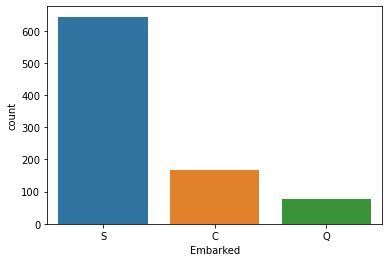

In [83]:
sns.countplot(df.Embarked)

In [84]:
df['Embarked']=df['Embarked'].fillna("S")

In [85]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

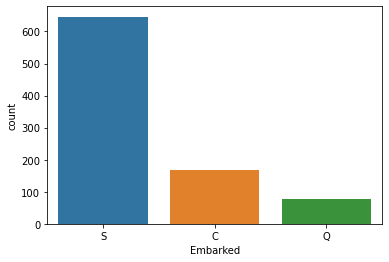

In [86]:
sns.countplot(df.Embarked)

In [87]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [88]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [89]:
df[df['Sex']=='male'].Age.median()

29.0

In [90]:
df[df['Sex']=='female'].Age.median()

27.0

In [91]:
df['Age']=df['Age'].fillna(28)

In [92]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [93]:
df.drop('Ticket',1,inplace=True)

In [94]:
df['Sex']=df["Sex"].map({'male':1,'female':0})

<AxesSubplot:>

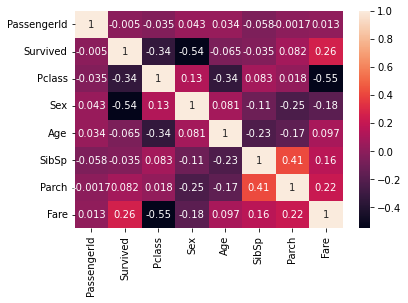

In [95]:
sns.heatmap(df.corr(),annot=True)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le=LabelEncoder()

In [98]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [99]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [100]:
cols=list(df.columns)
l=[]
for i in cols:
    if i!="Survived":
        l.append(i)
l

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [101]:
y=df.drop(columns=l)

In [102]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [103]:
X=df.drop(['Survived'],1)

In [105]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [112]:
import sklearn

In [114]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [115]:
models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('RidgeClassifier', RidgeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(("XGBoost", XGBClassifier()))
models.append(("XGBoost", XGBRFClassifier()))

In [116]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(name, "Score: {:.8f}".format(score))

LogisticRegression Score: 0.75336323
RidgeClassifier Score: 0.77130045
GaussianNB Score: 0.76681614
KNeighborsClassifier Score: 0.61434978
CART Score: 0.74439462
RF Score: 0.78923767
BC Score: 0.77578475
ExtraTreesClassifier Score: 0.78026906
AdaBoostClassifier Score: 0.77130045
GBM Score: 0.82959641
XGBoost Score: 0.82511211
XGBoost Score: 0.78026906


In [ ]:
# Final conclusion , Gradient Boosting Classifier gives us best accuracy of 93%